# BERTopic

This can all be easily done via [BERTopic](https://maartengr.github.io/BERTopic/algorithm/algorithm.html)

In [17]:
import numpy as np
import pandas as pd
from bertopic import BERTopic
from bertopic.dimensionality import BaseDimensionalityReduction

import gensim.downloader as api
from gensim.parsing.preprocessing import (
    preprocess_string, strip_multiple_whitespaces, strip_numeric, strip_punctuation,
    remove_stopwords, STOPWORDS
)

# Data

In [26]:
data = pd.read_json('../data/bookmarks_data.json').dropna()

In [27]:
data.head()

,title,url,url_text
1,Dashboard | edX,https://courses.edx.org/dashboard,\n Sign in or Register | edX\n
2,GT | GT Login,https://login.gatech.edu/cas/login,GT | GT Login I don't know my GT Account I don...
3,BuzzPort Login,https://buzzport.gatech.edu/cp/home/displaylogin,BuzzPort | Georgia Tech Creating the next Buzz...
4,Georgia Tech :: Account Management :: Passport,https://passport.gatech.edu/home,Georgia Tech :: Account Management :: Passport...
5,Georgia Tech OMS Analytics - Google+,https://plus.google.com/communities/1006647335...,Sign in - Google Accounts \n\n\n Sign in with...


In [28]:
data.shape

(1135, 3)

In [29]:
titles = data['title'].to_list()
content = data['url_text'].to_list()

In [30]:
titles[:10]

['Dashboard | edX',
 'GT | GT Login',
 'BuzzPort Login',
 'Georgia Tech :: Account Management :: Passport',
 'Georgia Tech OMS Analytics - Google+',
 'Georgia Tech Email Services :: Login',
 'CSE 6040 Slack',
 'OMSA Study Group Slack',
 'Team_NOVA Bios - Google Sheets',
 'DVA Project Ideas - Google Docs']

# Fit Model

In [31]:
embedding_model = api.load('glove-wiki-gigaword-50')

In [32]:
# Fit BERTopic without actually performing any dimensionality reduction
empty_dimensionality_model = BaseDimensionalityReduction()

In [37]:
model = BERTopic(
    embedding_model=embedding_model,
    umap_model=empty_dimensionality_model,
    top_n_words=5,
    n_gram_range=(1,3),
)
topics, probs = model.fit_transform(titles)

In [38]:
model.get_topic_info()

,Topic,Count,Name
0,-1,507,-1_to_python_in_and
1,0,133,0_https_python_html_hastie
2,1,87,1_cran package_cran_package_jupyter
3,2,63,2_in_and_python_in python
4,3,60,3_documentation_documentation sklearn_sklearn_...
5,4,58,4_and_data_with_for
6,5,37,5_dashboard_university_google_science handbook
7,6,33,6_with_and_forecasting_in python
8,7,31,7_documentation_welcome to_welcome_documentati...
9,8,30,8_numpy_v1_numpy v1_manual


In [39]:
model = BERTopic(
    embedding_model=embedding_model,
    top_n_words=5,
    n_gram_range=(1,3),
)
topics, probs = model.fit_transform(titles)

In [40]:
model.get_topic_info()

,Topic,Count,Name
0,-1,131,-1_python_with_documentation_and
1,0,132,0_https_html_python_hastie
2,1,99,1_to_for_how_how to
3,2,93,2_cran_cran package_package_jupyter
4,3,72,3_documentation_documentation sklearn_sklearn_20
5,4,51,4_with_to_in_how to
6,5,45,5_in_python_real python_real
7,6,40,6_pypi_programming guide_business analytics pr...
8,7,40,7_documentation_seaborn_learn_scikit
9,8,38,8_dashboard_johns hopkins_hopkins_johns


In [41]:
model.get_representative_docs(titles)

{8: ['Java Programming I | UCLA Continuing Education',
  'Docker Documentation | Docker Documentation',
  'Download Python | Python.org'],
 0: ['ChainMapper (Apache Hadoop Main 2.7.0 API)',
  'Microsoft Azure Notebooks',
  'https://pyyaml.org'],
 2: ['Linear Regression - Econometrics Academy',
  'Tutorials - CatBoost. Documentation',
  'Julia Archives - Stochastic Lifestyle'],
 21: ['SQLAlchemy - The Database Toolkit for Python',
  'PY4E - Python for Everybody',
  'SQLAlchemy - The Database Toolkit for Python'],
 15: ['GitHub - ipython/ipyparallel: Interactive Parallel Computing in Python',
  'Queuing System Discrete Event Simulation in Python (Process interaction) - YouTube',
  'Machine Learning in R - Next Generation • mlr3'],
 18: ['Python Multithreading Tutorial: Concurrency and Parallelism | Toptal',
  'Big Data and Data Science Online Program | Continuing Studies',
  'Jupyter Notebook Server with AWS EC2 and AWS VPC | Post | Coding For Entrepreneurs'],
 12: ['Object Oriented Prog

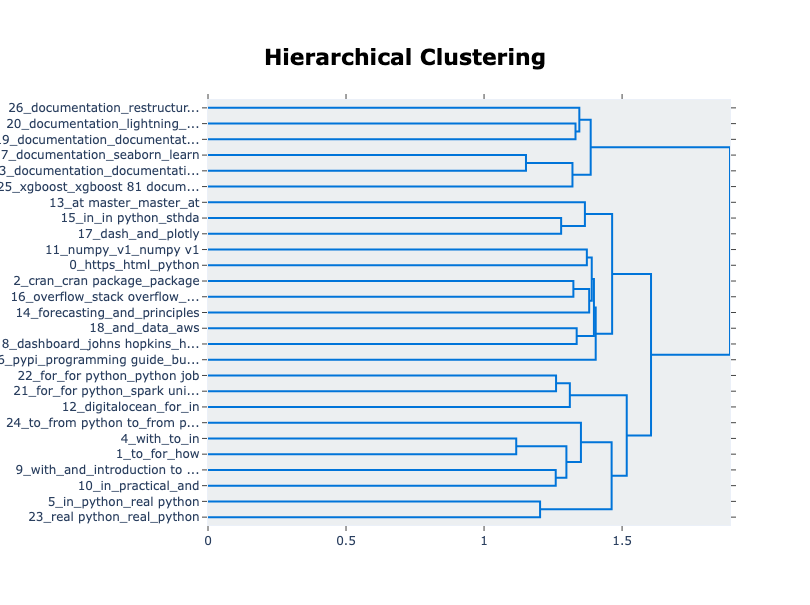

In [42]:
model.visualize_hierarchy()

# Fit Model (Preprocess Strings)

In [20]:
def processor(s):
    return " ".join(
        preprocess_string(
            s,
            filters=[
                lambda x: x.lower(),
                strip_multiple_whitespaces,
                strip_numeric,
                strip_punctuation,
                remove_stopwords
            ]
        )
    )

titles_clean = [processor(s) for s in titles]

In [23]:
model = BERTopic(
    embedding_model=embedding_model,
    top_n_words=5,
    n_gram_range=(1,3),
)
topics, probs = model.fit_transform(titles_clean)

In [24]:
model.get_topic_info()

,Topic,Count,Name
0,-1,301,-1_python_github_flask_airflow
1,0,203,0_data_science_data science_time
2,1,56,1_scikit learn documentation_learn documentati...
3,2,55,2_documentation_python documentation_legoland_...
4,3,53,3_uc_uc business_uc business analytics_program...
5,4,48,4_documentation_documentation overview_overvie...
6,5,40,5_python_real_real python_python real
7,6,32,6_python_modules_tutorials_python programming
8,7,29,7_master_github_xgboost_irkernel
9,8,28,8_overflow_stack overflow_stack_git


----------------